In [1]:
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm

In [2]:
train_images = glob('train/*.png')
train_images = np.array([cv2.imread(file, 0).flatten() for file in train_images])
train_labels = pd.read_csv('train/train_data.csv')

In [3]:
def one_hot_encoder(x):
    y=np.zeros((len(x), len(np.unique(x))))
    for i, n
    um in enumerate(x):
        y[i][num]=1
    return y

In [4]:
train_images = train_images/255

train_labels=one_hot_encoder(train_labels['label'].values)


In [21]:
class NET:
    def __init__(self, lr=0.01):
        self.w =np.random.uniform(
            low=-np.sqrt(6/110),
            high= np.sqrt(6/110),
            size=(784,10)

        )
        self.b =np.zeros(10)
        self.lr =lr

    def forward(self, x):
        self.z= np.dot(x,self.w) +self.b
        self.p= self.sigmoid(self.z)
        return self.p

    def update(self, x,t):
        p = self.forward(x)

        dE_dp =p-t
        dp_dz= p*(1-p)

        dE_dw =np.einsum('j,i->ij', dE_dp*dp_dz, x)
        dE_db =dE_dp*dp_dz

        self.w -= self.lr * dE_dw
        self.b -= self.lr * dE_db

    def sigmoid(self,x):
        return 1/(1+np.exp(-x))

    def get_error(self, true, pred):
        return 0.5* np.sum(np.square(true-pred))
        

In [22]:
#시드고정
random.seed(0)
np.random.seed(0)

#네트워크
net= NET(lr=0.01)

#훈련

errors=[]
for epoch in tqdm(range(10)):
    # 데이터 섞기
    index = np.arange(len(train_images))
    np.random.shuffle(index)    
    for image, label in zip(train_images[index], train_labels[index]):
        true = label
        pred = net.forward(image)
        error = net.get_error(true, pred)
        errors.append(error)
        net.update(image, label)

100%|██████████| 10/10 [00:04<00:00,  2.15it/s]


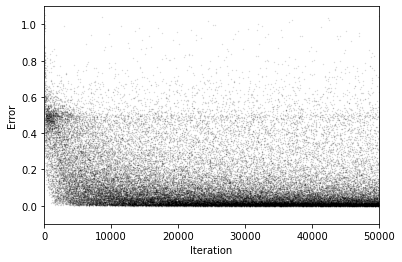

In [23]:
plt.scatter(list(range(0, len(errors))), errors, s=0.1, alpha=0.2, color='k')
plt.xlim(0, len(errors))
plt.ylim(-0.1, 1.1)
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.show()

In [25]:
test_images = glob('test/*.png')
test_images= np.array([cv2.imread(file,0).flatten() for file in test_images])
test_images=test_images/255

#예측
pred=[]

for x in test_images:
    pred.append(np.argmax(net.forward(x)))
pred =np.array(pred)

submission= pd.read_csv('submission.csv')
submission['label']= pred
submission.to_csv('submission.csv', index= False)
submission.head()

,file_name,label
0,idx0001.png,1
1,idx0002.png,0
2,idx0003.png,8
3,idx0004.png,3
4,idx0005.png,5
